<a href="https://colab.research.google.com/github/kunalavghade/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Line Fitting

In [ ]:
import pandas as pd
import numpy as np

## Import Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv")
df.head()

,83,234.289,235.6,159,107.608,1947,60.323
0,88.5,259.426,232.5,145.6,108.632,1948,61.122
1,88.2,258.054,368.2,161.6,109.773,1949,60.171
2,89.5,284.599,335.1,165.0,110.929,1950,61.187
3,96.2,328.975,209.9,309.9,112.075,1951,63.221
4,98.1,346.999,193.2,359.4,113.270,1952,63.639


## Convet pandas dataframe into numpy array

In [ ]:
data = df.values
x = data[:,4]
y = data[:,-1] 
x,y

(array([108.632, 109.773, 110.929, 112.075, 113.27 , 115.094, 116.219,
        117.388, 118.734, 120.445, 121.95 , 123.366, 125.368, 127.852,
        130.081]),
 array([61.122, 60.171, 61.187, 63.221, 63.639, 64.989, 63.761, 66.019,
        67.857, 68.169, 66.513, 68.655, 69.564, 69.331, 70.551]))

## define function to calculate intercept and slope

In [ ]:
def slope_intercept(x,y):
  slope = ((np.mean(x)*np.mean(y)) - np.mean(x*y))/((np.mean(x)*np.mean(x)) - np.mean(x*x))
  intercept = np.mean(y) - slope*np.mean(x)
  return [slope,intercept]


In [ ]:
m, c = slope_intercept(x,y)
m, c

(0.48093826579213933, 8.861512409822794)

## Build Regrassion Line

In [ ]:
# y = (m*x)+c
regression_line = [((m*i)+c) for i in x]
regression_line[0:10]

[61.10679809935448,
 61.6555486606233,
 62.211513295879016,
 62.76266854847681,
 63.33738977609841,
 64.21462117290326,
 64.75567672191943,
 65.31789355463044,
 65.96523646038666,
 66.78812183315702]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

## plote regression line and data samples

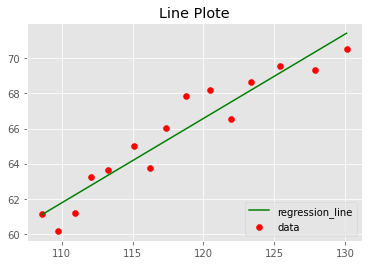

In [ ]:
style.use('ggplot')
plt.scatter(x,y,color = "red",label="data")
plt.plot(x,regression_line,color = "green",label="regression_line")
plt.legend(loc=4)
plt.title("Line Plote")
plt.show()

## Predict the Value

In [ ]:
px = 120
py = (m*px)+c
py

66.57410430487951

# 2. Linear Regrassion

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning and Normalization

In [ ]:
data['Species'] =  pd.factorize(data['Species'])[0]+1
data.head(),data['Species'].value_counts()

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
 0   1            5.1           3.5            1.4           0.2        1
 1   2            4.9           3.0            1.4           0.2        1
 2   3            4.7           3.2            1.3           0.2        1
 3   4            4.6           3.1            1.5           0.2        1
 4   5            5.0           3.6            1.4           0.2        1,
 1    50
 2    50
 3    50
 Name: Species, dtype: int64)

In [ ]:
data = data.values
x = data[:,4]
y = data[:,5]
x,y

(array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
        1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
        1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
        1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
        1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
        2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
        2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
        1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
        2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,


## Split data for Training and Testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_test,y_test

(array([2.4, 1. , 0.2, 1.8, 0.2, 2.5, 0.3, 1.5, 1.4, 1.3, 1.4, 1.5, 1.2,
        1.5, 1.4, 0.1, 1.5, 1.2, 0.3, 0.4, 2. , 1.5, 0.2, 0.2, 1.8, 0.2,
        0.4, 1.3, 1. , 0.4]),
 array([3., 2., 1., 3., 1., 3., 1., 2., 2., 2., 3., 2., 2., 2., 2., 1., 2.,
        2., 1., 1., 3., 2., 1., 1., 3., 1., 1., 2., 2., 1.]))

## Creat Model and fit the data

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_dim=1),tf.keras.layers.Dense(10,activation=tf.nn.sigmoid),tf.keras.layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss=tf.keras.losses.mean_squared_error,metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
model.fit(x_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.9973 - mean_squared_error: 3.9973
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.2316 - mean_squared_error: 1.2316
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.3449 - mean_squared_error: 1.3449
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3055 - mean_squared_error: 0.3055
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6276 - mean_squared_error: 0.6276
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3870 - mean_squared_error: 0.3870
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1332 - mean_squared_error: 0.1332
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2185 - mean_squared_error: 0.2185
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1185 - mean_squared_error: 0.1185
Epoch 10/1000
4/4 [=========

## Evaluate the Model

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

1/1 [==============================] - 0s 103ms/step - loss: 0.0357 - mean_squared_error: 0.0357


[0.03571399673819542, 0.03571399673819542]

## Pradict The Output

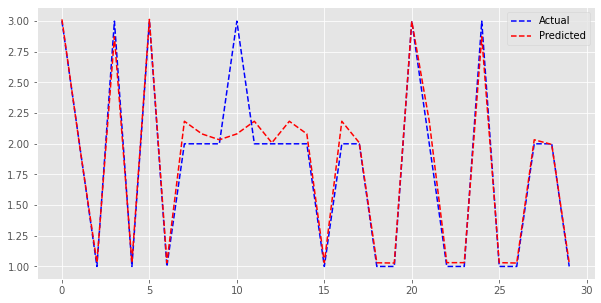

In [ ]:
y_pred = model.predict(x_test);
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(x_test),1),y_test,'b--',label='Actual')
plt.plot(np.arange(0,len(x_test),1),y_pred,'r--',label='Predicted')
plt.legend()
plt.show()

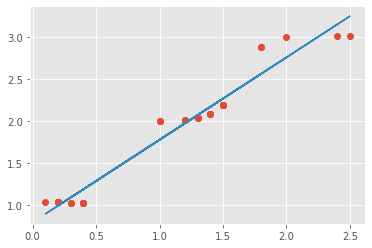

In [ ]:
plt. plot(x_test,y_pred, 'o')
m, b = np. polyfit(x_test,y_pred, 1) 
plt. plot(x_test, m*x_test + b)

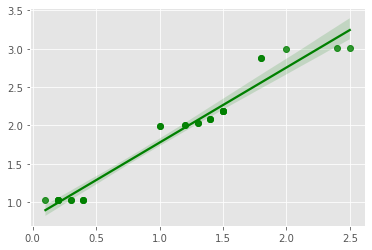

In [ ]:
import seaborn as sns
#sns.set_theme(color_codes=True)
sns.regplot(x=x_test, y=y_pred, color="g")

# Regrassion

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Data set

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Normalization

In [3]:
data['Species'] =  pd.factorize(data['Species'])[0]+1
data.head(),data['Species'].value_counts()

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
 0   1            5.1           3.5            1.4           0.2        1
 1   2            4.9           3.0            1.4           0.2        1
 2   3            4.7           3.2            1.3           0.2        1
 3   4            4.6           3.1            1.5           0.2        1
 4   5            5.0           3.6            1.4           0.2        1,
 1    50
 2    50
 3    50
 Name: Species, dtype: int64)

In [5]:
dnorm = (data-data.min())/(data.max()-data.min())
dnorm.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Train-test Split

In [6]:
target = data.pop('Species')
y = target.values
x = dnorm.values

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train.shape,y_train.shape

((112, 6), (112,))

## Build and train model

In [20]:
model = keras.models.Sequential([
                                 keras.layers.Dense(16, activation = 'relu',input_shape=(6,)), 
                                 keras.layers.Dense(1)
                                 ])
model.compile(loss = "mae",optimizer = 'sgd')
history = model.fit(x_train,y_train,epochs=1000,verbose=0)

## Evaluate Model

In [21]:
htest =  model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0178


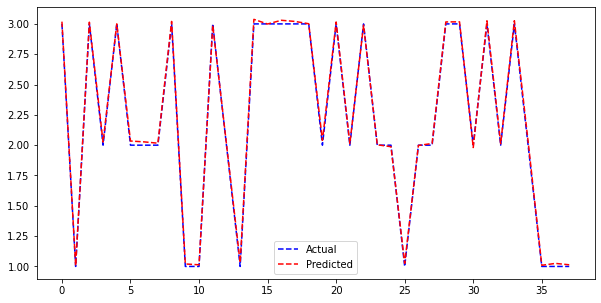

In [22]:
x_new = x_test[:50]
pred =  model.predict(x_new)
plt.figure(figsize = (10,5))
plt.plot(np.arange(0,len(x_new),1),y_test[:50],'b--',label='Actual')
plt.plot(np.arange(0,len(x_new),1),pred,'r--',label='Predicted')
plt.legend()
plt.show()

[0.99810678]


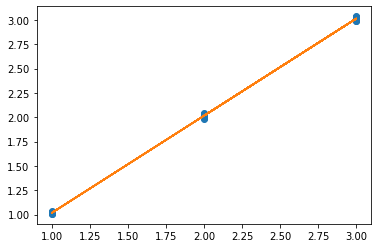

In [23]:
plt.plot(y_test[:50],pred,'o')
m,b = np.polyfit(y_test[:50],pred,1)
plt.plot(y_test[:50],m*y_test +b)
print(m)

# 4. Classification 

In [ ]:
import tensorflow as tf
import numpy as np 

## Import Data

In [ ]:
data = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = data.load_data()

x_train, x_test = x_train/ 255.0, x_test/ 255.0

11501568/11490434 [==============================] - 0s 0us/step


## Build Tensor Network

In [ ]:
print("Training Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_train.ndim)
print("Tensor shape: ", x_train.shape)
print("Data type: %s"%x_train.dtype)
print("=======================")
print()
print("Test Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_test.ndim)
print("Tensor shape: ", x_test.shape)
print("Data type: %s"%x_test.dtype)

Training Tensors
Number of dimensions in tensor: 3
Tensor shape:  (60000, 28, 28)
Data type: float64

Test Tensors
Number of dimensions in tensor: 3
Tensor shape:  (10000, 28, 28)
Data type: float64


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train Tensor Network

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3006 - accuracy: 0.9122
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1490 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1107 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0915 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0759 - accuracy: 0.9763
313/313 - 1s - loss: 0.0831 - accuracy: 0.9739 - 556ms/epoch - 2ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 drop

## Predict 

In [ ]:
predictions = model.predict(x_test)
print(predictions[1010])
np.argmax(predictions[1010])

[7.2607678e-14 2.1892162e-10 5.4808127e-09 7.6320406e-10 9.9972183e-01
 4.1741600e-08 2.7451237e-09 2.3843333e-04 1.3509223e-05 2.6133101e-05]


4

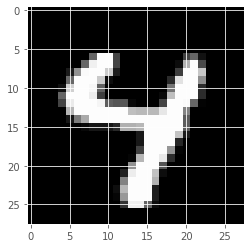

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1010],cmap='gray')

In [ ]:
predictions = model.predict(x_test)
print(predictions[100])
print(type(predictions))
np.argmax(predictions[100])

[3.5527410e-06 5.2075524e-07 2.5945676e-06 6.4947190e-09 4.6738978e-06
 3.8232720e-06 9.9998415e-01 3.4071610e-07 3.3143576e-07 3.0237486e-09]
<class 'numpy.ndarray'>


6

In [ ]:
pred=[]
for j in range(len(predictions)):
   pred.append(np.argmax(predictions[j]))

## Evaluate the Model 

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 963,    0,    0,    3,    1,    1,    8,    1,    2,    1],
       [   0, 1127,    2,    1,    0,    0,    3,    0,    2,    0],
       [   1,    0, 1005,   11,    1,    0,    3,    3,    8,    0],
       [   0,    0,    1,  999,    0,    3,    1,    3,    3,    0],
       [   1,    0,    2,    0,  963,    0,    6,    1,    2,    7],
       [   2,    0,    0,   19,    3,  858,    6,    1,    1,    2],
       [   3,    3,    0,    1,    3,    3,  945,    0,    0,    0],
       [   1,    5,   10,   10,    0,    0,    0,  997,    0,    5],
       [   4,    2,    2,   16,    4,    8,    3,    6,  928,    1],
       [   1,    6,    0,   19,   15,    1,    0,   11,    2,  954]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,pred))

print('F1 score:',sklearn.metrics.f1_score(y_test,pred,
                            average='weighted'))

print( 'Recall:',sklearn.metrics.recall_score(y_test,pred,
                              average='weighted'))

print('Precision:',sklearn.metrics.precision_score(y_test,pred,
                                    average='weighted'))

Accuracy: 0.9739
F1 score: 0.9739219324916849
Recall: 0.9739
Precision: 0.9743101054702616


# 5. SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

## Cleaning And normalizing Data

In [ ]:
#Encoding the categorical column
data = data.replace({"Species":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


## Split Dataset for Train and Test

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,62,5.9,3.0,4.2,1.5
92,93,5.8,2.6,4.0,1.2
112,113,6.8,3.0,5.5,2.1
2,3,4.7,3.2,1.3,0.2
141,142,6.9,3.1,5.1,2.3
...,...,...,...,...,...
9,10,4.9,3.1,1.5,0.1
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
117,118,7.7,3.8,6.7,2.2


## Create and train Model

In [ ]:
from sklearn.svm import SVC
model =  SVC(kernel = "linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

### Predict the expexted values

In [ ]:
#predict the output
y_pred = model.predict(X_test)

## Validate Trained Model By confustion Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import sklearn
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,y_pred))

print('F1 score:',sklearn.metrics.f1_score(y_test,y_pred,
                            average='weighted'))

print( 'Recall:',sklearn.metrics.recall_score(y_test,y_pred,
                              average='weighted'))

print('Precision:',sklearn.metrics.precision_score(y_test,y_pred,
                                    average='weighted'))

Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0


# 6. K Means Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preparing Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
x = data.iloc[:, [0, 1, 2, 3]].values
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# frequency distribution of species
iris_outcome = pd.crosstab(index=data['Species'],columns="count")
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Finding Optimal Number of clusters

### Elbow Methode

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter =300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

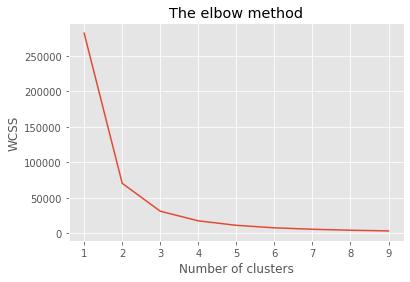

In [ ]:
plt.plot(range(1,10),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### silhouette score method

In [ ]:
from sklearn.metrics import silhouette_score
SS=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    labels = kmeans.labels_
    ss=silhouette_score(x,labels,metric='euclidean')
    SS.append(ss)

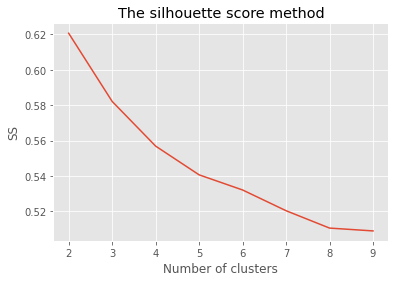

In [ ]:
plt.plot(range(2, 10),SS)
plt.title('The silhouette score method')
plt.xlabel('Number of clusters')
plt.ylabel('SS') 
plt.show()

## Implementing K-Mean Clustering

In [ ]:
kmeans = KMeans(n_clusters = 3 ,init='k-means++',n_init =10,max_iter=300,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising Clusters

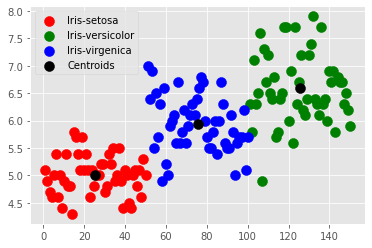

In [ ]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='red',label ="Iris-setosa" )
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='green',label ="Iris-versicolor" )
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='blue',label ="Iris-virgenica" )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

# 7. Backpropogation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x1 = np.array([0,1,0,1])
x2 = np.array([0,0,1,1])
y = np.array([0,1,1,0])

error = []
itration = []

In [ ]:
np.random.rand(23)

w00 = np.random.rand()
w01 = np.random.rand()
w10 = np.random.rand()
w11 = np.random.rand()

b1 = 1.0

w2 = np.random.rand()
w3 = np.random.rand()

b2 = 1.0

In [ ]:
for i in range(1000):
  # forward
  
  z1 = w00*x1 + w01*x2 + b1
  z2 = w10*x1 + w11*x2 + b1

  h1 = 1 / (1 + np.exp(-z1))
  h2 = 1 / (1 + np.exp(-z2))

  zout = w2 * h1 + w3 *h2 + b2
  o = 1 / (1 + np.exp(-zout))

  # backpropagation

  e = 0.5 * np.mean((o - y) * (o - y))

  de_do = o-y
  do_dzout = o * (1-o)
  dzout_dw2 = h1
  dzout_dw3 = h2
  dzout_db2 = 1

  de_w2 = de_do * do_dzout * dzout_dw2
  de_w3 = de_do * do_dzout * dzout_dw3
  de_db2 = de_do * do_dzout * dzout_db2

  dzout_dh1=w2
  dh1_dz1=h1*(1-h1)
  dzout_dh2=w3
  dh2_dz2=h2*(1-h2)
  dz1_dw00=x1
  dz2_dw01=x2
  dz1_dw10=x1
  dz2_dw11=x2
  dz1_db1=1
  dz2_db1=1
  
  # chain rule
  de_dw00=de_do*do_dzout*dzout_dh1*dh1_dz1*dz1_dw00

  de_dw01=de_do*do_dzout*dzout_dh2*dh2_dz2*dz2_dw01

  de_dw10=de_do*do_dzout*dzout_dh1*dh1_dz1*dz1_dw10

  de_dw11=de_do*do_dzout*dzout_dh2*dh2_dz2*dz2_dw11

  de_db1=de_do*do_dzout*dzout_dh1*dh1_dz1*dz1_db1+de_do*do_dzout*dzout_dh2*dh2_dz2*dz2_db1
    

  w00-=de_dw00
  w01-=de_dw01
  w10-=de_dw10
  w11-=de_dw11
  b1-=de_db1
  b2-=de_db2
  error.append(np.mean(e))
  itration.append(i)

w= [0.99009067 1.09091065 0.99009067 0.41949971] [0.85876567 0.85876567 1.03789467 0.01144845] [ 0.0102716   0.11109158  0.0102716  -0.56031935] [ 0.14451938  0.14451938  0.32364838 -0.70279784]
w2,w3= 0.744165125486895 0.7533617539147294
b1,b2= [-0.82016824  1.30007876  1.28689345 -0.41790817] [-4.23712819  2.50299192  2.48767838 -4.30138511]


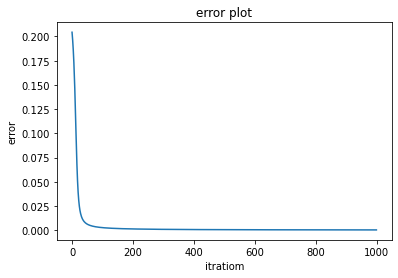

In [ ]:
plt.ylabel("error")
plt.xlabel("itratiom")
plt.title("error plot")
plt.plot(itration,error)
print("w=",w00,w01,w10,w11)
print("w2,w3=",w2,w3)
print("b1,b2=",b1,b2)

In [ ]:
x1=np.array([0,1,0,1])
x2=np.array([0,0,1,1])

z1=w00*x1+w01*x2+b1
z2=w10*x1+w11*x2+b1
h1=1/(1+np.exp(-z1))
h2=1/(1+np.exp(-z2))

zout=w2*h1+w3*h2+b2
o=1/(1+np.exp(-zout))
print("o =",np.round(o))

o = [0. 1. 1. 0.]


# 8. Classification Using CNN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras import layers,models

## Import and split data

In [ ]:
data =  tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


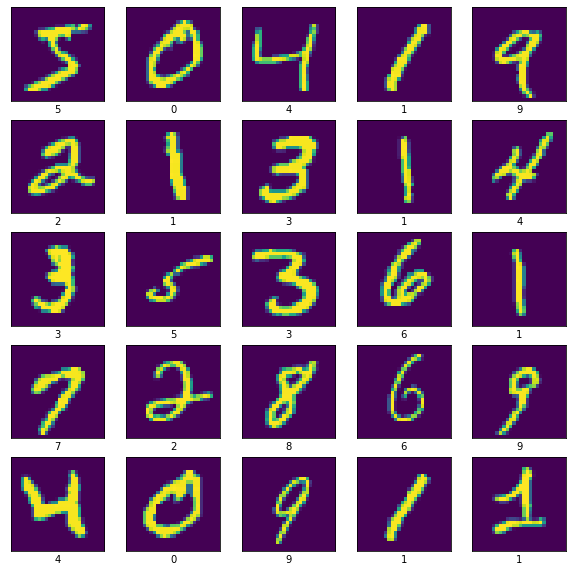

In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

## Resizing image to 28x28

In [ ]:
x_trian =  x_train.reshape(x_train.shape[0],28,28,1)
x_test =  x_test.reshape(x_test.shape[0],28,28,1)
x_trian.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Build the Neural Network

In [ ]:
model =  models.Sequential();
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

## Train the Network

In [ ]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs =10, validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 55s 29ms/step - loss: 0.1520 - accuracy: 0.9528 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0436 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0291 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0314 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0310 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0348 - val_accura

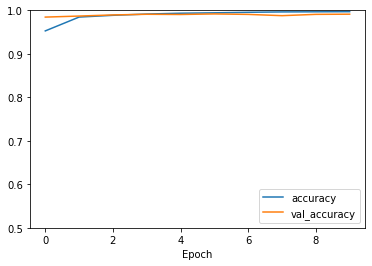

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()

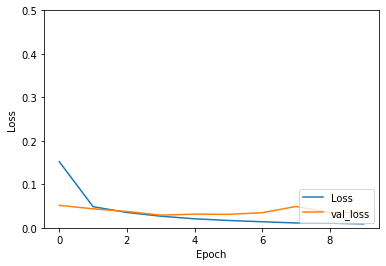

In [ ]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0,0.5])
plt.legend(loc='lower right')
plt.show()

## Evaluate Model

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0362 - accuracy: 0.9912


[0.03619080409407616, 0.9911999702453613]

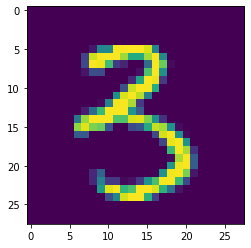

(28, 28)

In [ ]:
x_test = x_test.reshape(x_test.shape[0],28,28)
plt.imshow(x_test[5000])
plt.show()
x_test[5000].shape

In [ ]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)
predictions = model.predict(x_test)
print("predicted value:" + str(np.argmax(predictions[5000])))

predicted value:3


In [ ]:
pred = []
for i in predictions:
  pred.append(np.argmax(i))
pred[15]

5

## Evaluate Performance 

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 976,    1,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    0,    0,    0,    1,    0,    2,    0,    0],
       [   2,    1, 1023,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    2, 1005,    0,    2,    0,    1,    0,    0],
       [   0,    0,    3,    0,  970,    0,    2,    1,    0,    6],
       [   0,    0,    0,    6,    0,  882,    1,    1,    1,    1],
       [   2,    2,    3,    0,    0,    3,  946,    0,    2,    0],
       [   0,    2,    5,    1,    0,    0,    0, 1018,    0,    2],
       [   1,    0,    1,    2,    0,    1,    0,    3,  963,    3],
       [   0,    0,    0,    1,    5,    3,    0,    3,    0,  997]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,pred))

print('F1 score:',sklearn.metrics.f1_score(y_test,pred,
                            average='weighted'))

print( 'Recall:',sklearn.metrics.recall_score(y_test,pred,
                              average='weighted'))

print('Precision:',sklearn.metrics.precision_score(y_test,pred,
                                    average='weighted'))

Accuracy: 0.9912
F1 score: 0.9912017812753268
Recall: 0.9912
Precision: 0.99121781365177
